In [ ]:
'''Tên các thành viên:
Phạm Phú Bình - 521H0495
Giang Hoằng Đạt - 521H0498
Nguyễn Khắc Huy - 521H0502

'''

In [4]:
!pip install scikit-learn
import numpy as np
!pip install numpy
import pandas as pd
!pip install pandas

In [1]:
#Importing dataset
import numpy as np
import pandas as pd
# 1.1 read data 
filename = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(filename)
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


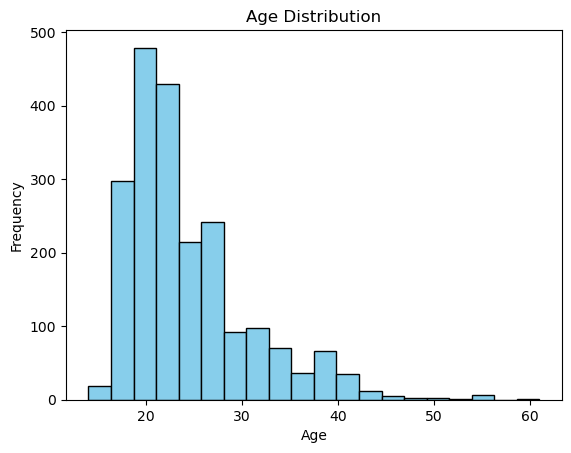

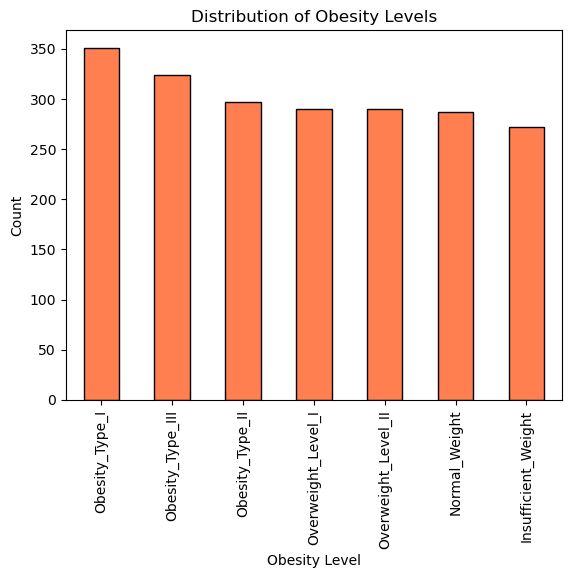

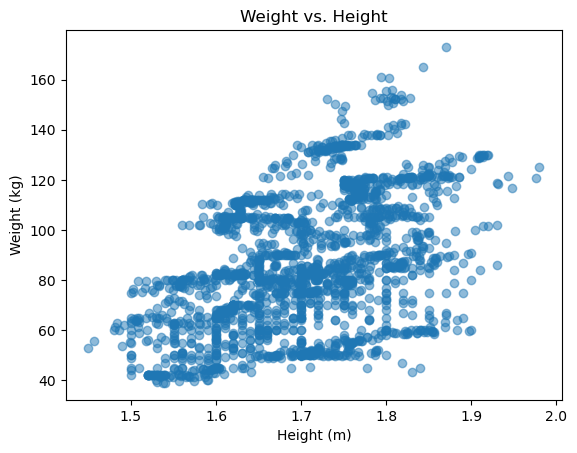

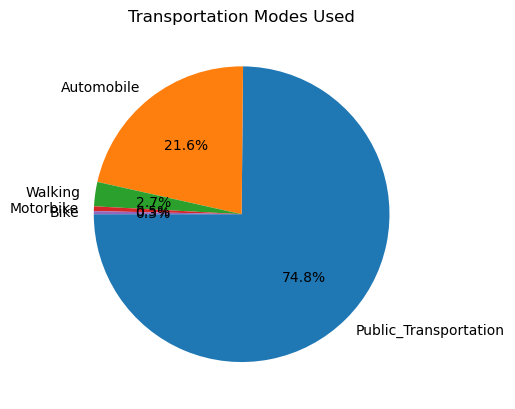

In [6]:
#Vẽ hình để đánh giá các đặc trưng trong dataset
import matplotlib.pyplot as plt



# Histogram for Age distribution
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for NObeyesdad categories
df['NObeyesdad'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show() 

# Scatter plot of Weight vs. Height
plt.scatter(df['Height'], df['Weight'], alpha=0.5)
plt.title('Weight vs. Height')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show() 

# Pie chart for Transportation Modes
df['MTRANS'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Transportation Modes Used')
plt.ylabel('')  # Hide the y-label

# Adjust layout
# plt.tight_layout()
plt.show()

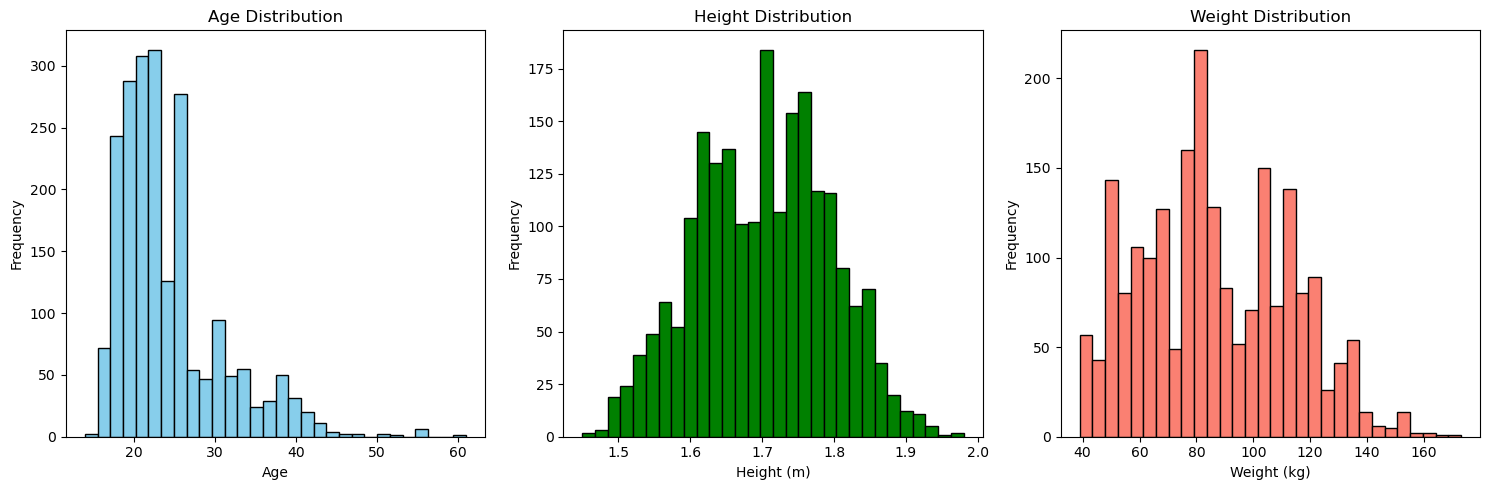

In [7]:
# Setting up the matplotlib figure
plt.figure(figsize=(15, 5))

# Histogram for Age
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Height
plt.subplot(1, 3, 2)
plt.hist(df['Height'], bins=30, color='green', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (m)')
plt.ylabel('Frequency')

# Histogram for Weight
plt.subplot(1, 3, 3)
plt.hist(df['Weight'], bins=30, color='salmon', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
# Define age groups
bins = [0, 18, 35, 55, 100]
labels = ['0-18', '19-35', '36-55', '56+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Grouping by Age Group and NObeyesdad to see the count in each category
age_group_obesity = df.groupby(['Age Group', 'NObeyesdad']).size().reset_index(name='Count')

# Creating a pivot table for easier visualization
pivot_table = age_group_obesity.pivot(index='Age Group', columns='NObeyesdad', values='Count').fillna(0)

pivot_table

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Age Group,,,,,,,
0-18,49,25,8,0,0,20,11
19-35,222,254,272,268,324,248,239
36-55,1,7,71,29,0,21,35
56+,0,1,0,0,0,1,5


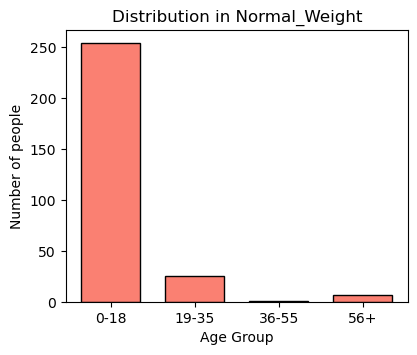

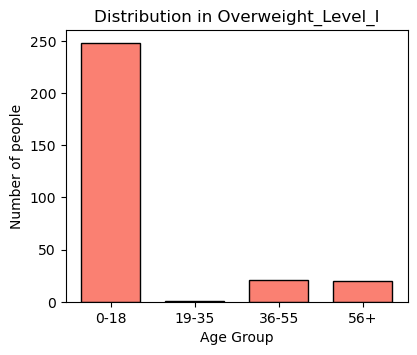

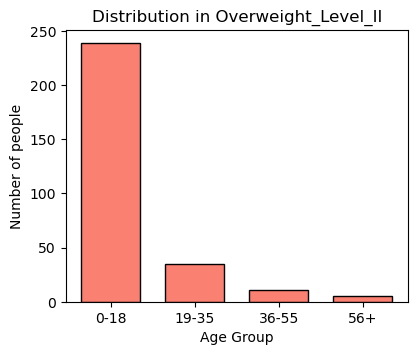

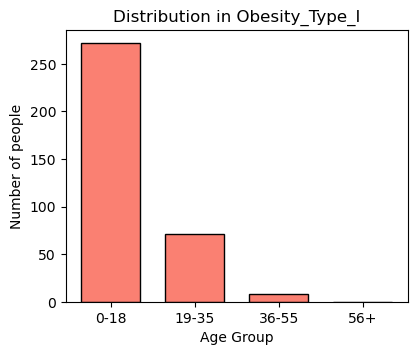

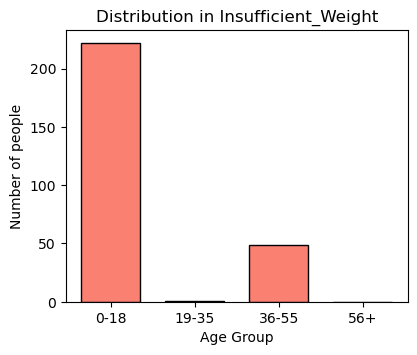

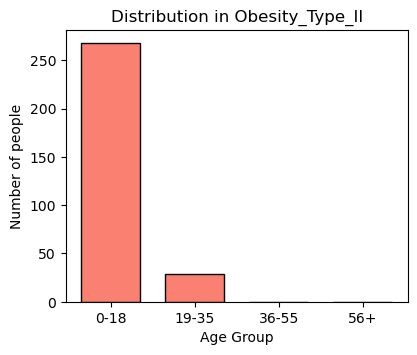

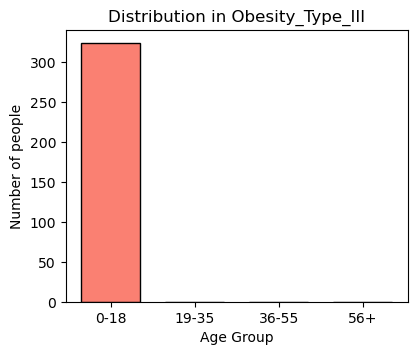

In [13]:
# List of obesity levels
obesity_levels = df['NObeyesdad'].unique()

# Creating a histogram for each obesity level
for i, level in enumerate(obesity_levels):
    plt.figure(figsize=(15, 12))

    plt.subplot(3, 3, i+1)
    subset = df[df['NObeyesdad'] == level]
    plt.hist(subset['Age Group'].dropna(), bins=range(5), align='left', rwidth=0.7, color='salmon', edgecolor='black')

    plt.title(f'Distribution in {level}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of people')
    plt.xticks(range(4), labels)
    plt.show()

In [26]:
# 1.1 read data 
filename = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(filename)
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [27]:
names = list(df.columns)
print(names)

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [28]:
types = df.dtypes
print(types)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [29]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object' or types[i] =='date':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])

print('Successful')

Successful


In [30]:
types = df.dtypes
print(types)

Gender                              int32
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                              float64
NCP                               float64
CAEC                                int32
SMOKE                               int32
CH2O                              float64
SCC                                 int32
FAF                               float64
TUE                               float64
CALC                                int32
MTRANS                              int32
NObeyesdad                          int32
dtype: object


In [31]:
data = df.values

In [32]:
X = data[:,:-1]
y = data[:, -1]
print(X.shape)
print(y.shape)

(2111, 16)
(2111,)


In [33]:
#MinMaxScaler cũng là một phương pháp để tránh overfitting
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.         0.14893617 0.32075472 0.18656716 1.         0.
 0.5        0.66666667 0.66666667 0.         0.5        0.
 0.         0.5        1.         0.75      ]


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split \
(X_scaled,y,random_state=42)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

Confusion Matrix:
[[58  3  5  0  0  2  0]
 [27 28  6  0  0 12  5]
 [ 0  1 58 26  0  6  3]
 [ 0  0  6 68  0  0  1]
 [ 0  0  1  0 78  0  0]
 [ 2 10 34  0  0 22  3]
 [ 0  7 32  5  0  3 16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75        68
         1.0       0.57      0.36      0.44        78
         2.0       0.41      0.62      0.49        94
         3.0       0.69      0.91      0.78        75
         4.0       1.00      0.99      0.99        79
         5.0       0.49      0.31      0.38        71
         6.0       0.57      0.25      0.35        63

    accuracy                           0.62       528
   macro avg       0.63      0.61      0.60       528
weighted avg       0.62      0.62      0.60       528

MAE test score: 1.009469696969697
RMSE test score: 1.8591501805769737


In [36]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#Giảm độ sâu của cây để tránh overfitting (pruning)
clr = tree.DecisionTreeClassifier(random_state=0,max_depth=10)
clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

Confusion Matrix:
[[65  3  0  0  0  0  0]
 [10 63  0  0  0  5  0]
 [ 0  1 88  3  0  0  2]
 [ 0  0  3 72  0  0  0]
 [ 0  0  1  0 78  0  0]
 [ 0  8  0  0  0 61  2]
 [ 0  0  0  0  0  7 56]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91        68
         1.0       0.84      0.81      0.82        78
         2.0       0.96      0.94      0.95        94
         3.0       0.96      0.96      0.96        75
         4.0       1.00      0.99      0.99        79
         5.0       0.84      0.86      0.85        71
         6.0       0.93      0.89      0.91        63

    accuracy                           0.91       528
   macro avg       0.91      0.91      0.91       528
weighted avg       0.92      0.91      0.91       528

MAE test score: 0.17234848484848486
RMSE test score: 0.7190587281616534


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso, Ridge

#L1 regularization (Lasso) và L2 regularization (Ridge) để tránh overfitting 
# L1 regularization (Lasso)
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))
# L2 regularization (Ridge)
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))
# LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 1.5827638980469987
RMSE test score: 1.829873858487253
MAE test score: 1.3715027911823274
RMSE test score: 1.6424524250713008
MAE test score: 1.3714131475894646
RMSE test score: 1.6424624644218588


In [38]:
#Feature selection cũng là một cách để tăng hiệu quả và độ chính xác của model
#cũng như là một cách để tránh overfitting
from sklearn.feature_selection import SelectKBest, f_regression
#Lựa chọn 12 feature: k =12
#Tổng feature: 16

selector = SelectKBest(score_func=f_regression, k=12)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [39]:
#Cải thiện độ chính xác
#Áp dụng feature selection để truyền vào model DecisionTreeClassifier tăng độ hiểu quả
#Accuracy khi không áp dụng feature selection: 0.91
#Accuracy khi áp dụng feature selection: 0.93
#Quan trọng trong select best K feature là lựa chọn số k phù hợp, nếu không
#sẽ còn giảm độ chính xác của mô hình
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#Giảm độ sâu của cây để tránh overfitting (pruning)
clr = tree.DecisionTreeClassifier()
clr.fit(X_train_selected, y_train)
y_pred = clr.predict(X_test_selected)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

Confusion Matrix:
[[66  2  0  0  0  0  0]
 [ 8 65  0  0  0  5  0]
 [ 0  1 86  3  1  0  3]
 [ 0  0  2 73  0  0  0]
 [ 0  0  0  0 79  0  0]
 [ 0  8  0  0  0 62  1]
 [ 0  0  0  0  0  8 55]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        68
         1.0       0.86      0.83      0.84        78
         2.0       0.98      0.91      0.95        94
         3.0       0.96      0.97      0.97        75
         4.0       0.99      1.00      0.99        79
         5.0       0.83      0.87      0.85        71
         6.0       0.93      0.87      0.90        63

    accuracy                           0.92       528
   macro avg       0.92      0.92      0.92       528
weighted avg       0.92      0.92      0.92       528

MAE test score: 0.17234848484848486
RMSE test score: 0.7346922670565733


In [40]:
#Ensemble learning
#Boosting
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingClassifier
gbdt = HistGradientBoostingClassifier(min_samples_leaf=1).fit(X_train, y_train)
y_pred= gbdt.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

Confusion Matrix:
[[66  2  0  0  0  0  0]
 [ 4 70  0  0  0  4  0]
 [ 0  0 92  1  0  0  1]
 [ 0  0  2 73  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 66  1]
 [ 0  0  0  0  0  0 63]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        68
         1.0       0.92      0.90      0.91        78
         2.0       0.98      0.98      0.98        94
         3.0       0.97      0.97      0.97        75
         4.0       1.00      0.99      0.99        79
         5.0       0.94      0.93      0.94        71
         6.0       0.97      1.00      0.98        63

    accuracy                           0.96       528
   macro avg       0.96      0.96      0.96       528
weighted avg       0.96      0.96      0.96       528

MAE test score: 0.08901515151515152
RMSE test score: 0.5418123347254159


In [41]:
#Ensemble learning
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
y_pred= bagging.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

Confusion Matrix:
[[60  4  0  0  0  4  0]
 [10 45  5  0  0  8 10]
 [ 1  2 77  4  1  2  7]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  0 79  0  0]
 [ 5 12  3  0  0 43  8]
 [ 1  1  4  5  1  4 47]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        68
         1.0       0.70      0.58      0.63        78
         2.0       0.86      0.82      0.84        94
         3.0       0.89      0.99      0.94        75
         4.0       0.98      1.00      0.99        79
         5.0       0.70      0.61      0.65        71
         6.0       0.65      0.75      0.70        63

    accuracy                           0.80       528
   macro avg       0.79      0.80      0.80       528
weighted avg       0.80      0.80      0.80       528

MAE test score: 0.5757575757575758
RMSE test score: 1.4898647487933157


In [43]:
#Ensemble learning
#voting
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4) #Độ sâu của cây
clf2 = KNeighborsClassifier(n_neighbors=7) #7 k gần nhất
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'Ensemble']):
         scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
         print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

y_pred= eclf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

Accuracy: 0.78 (+/- 0.02) [DecisionTreeClassifier]
Accuracy: 0.75 (+/- 0.01) [KNeighborsClassifier]
Accuracy: 0.80 (+/- 0.02) [SVC]
Accuracy: 0.87 (+/- 0.02) [Ensemble]
Confusion Matrix:
[[66  2  0  0  0  0  0]
 [ 9 62  0  0  0  3  4]
 [ 0  0 80  9  0  2  3]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 2 14  1  0  0 47  7]
 [ 0  2  6  1  0  4 50]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        68
         1.0       0.78      0.79      0.78        78
         2.0       0.91      0.85      0.88        94
         3.0       0.87      0.99      0.93        75
         4.0       1.00      0.99      0.99        79
         5.0       0.84      0.66      0.74        71
         6.0       0.78      0.79      0.79        63

    accuracy                           0.87       528
   macro avg       0.86      0.86      0.86       528
weighted avg       0.87      0.87      0.86       528

MAE test score: 0.35795

In [44]:
!pip install tensorflow

In [45]:
#FEED FORWARD NEUTRAL NETWORK
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [46]:
#FEED FORWARD NEUTRAL NETWORK
model = Sequential()
#Áp dụng các regularization để giảm overfitting
model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss=tf.keras.losses.MeanSquaredError())

history = model.fit(x=X_train,y=y_train, validation_split=0.1,
          batch_size=128,epochs=100)



Epoch 1/100

12/12 [==============================] - 1s 28ms/step - loss: 8.6642 - val_loss: 5.9126
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 5.7084 - val_loss: 5.5066
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 5.0702 - val_loss: 4.9251
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 4.6413 - val_loss: 4.5975
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 4.2942 - val_loss: 4.1876
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 4.0103 - val_loss: 3.9534
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 3.7886 - val_loss: 3.7521
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 3.6311 - val_loss: 3.7176
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 3.4949 - val_loss: 3.7274
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 3.3785 - val_loss: 3.4132
Epoch

12/12 [==============================] - 0s 4ms/step - loss: 1.0257 - val_loss: 1.3535
Epoch 78/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9915 - val_loss: 1.3363
Epoch 79/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0566 - val_loss: 1.4034
Epoch 80/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9723 - val_loss: 1.3132
Epoch 81/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9611 - val_loss: 1.4443
Epoch 82/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9509 - val_loss: 1.2940
Epoch 83/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9272 - val_loss: 1.3281
Epoch 84/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9473 - val_loss: 1.5092
Epoch 85/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9947 - val_loss: 1.2687
Epoch 86/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9409 - val_loss: 1.2979
Epoch 87/100


In [47]:
#FEED FORWARD NEUTRAL NETWORK
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 39849 (155.66 KB)
Trainable params: 39849 (155.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


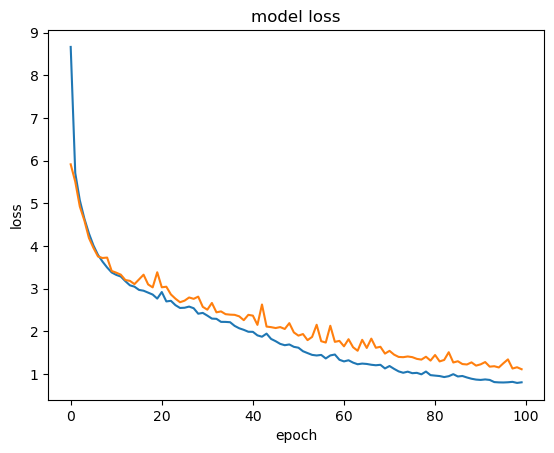

In [48]:
#FEED FORWARD NEUTRAL NETWORK
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [49]:
#FEED FORWARD NEUTRAL NETWORK
y_pred = model.predict(X_test)

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# Root Mean Squared Error (RMSE)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

17/17 [==============================] - 0s 2ms/step
MAE: 0.5769691722622762
MSE: 0.8046877605022651
RMSE: 0.8970439011008687


In [89]:
#RECCURENT NEUTRAL NETWORK
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,SimpleRNN, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop




model = Sequential()

model.add(Embedding(10000, 128, input_length=1))
model.add(Dropout(0.5))
model.add(SimpleRNN(64, dropout=0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))


In [90]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError())

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

results = model.evaluate(X_test, y_test)

Epoch 1/100
10/10 [==============================] - 2s 55ms/step - loss: 9.6290 - val_loss: 3.5902
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 4.4290 - val_loss: 3.5823
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 4.2259 - val_loss: 3.5895
Epoch 4/100
10/10 [==============================] - 0s 20ms/step - loss: 4.1811 - val_loss: 3.5823
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 4.1337 - val_loss: 3.5704
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 4.0870 - val_loss: 3.7228
Epoch 7/100
10/10 [==============================] - 0s 19ms/step - loss: 4.1284 - val_loss: 3.5904
Epoch 8/100
10/10 [==============================] - 0s 19ms/step - loss: 4.1454 - val_loss: 3.5791
Epoch 9/100
10/10 [==============================] - 0s 18ms/step - loss: 4.0619 - val_loss: 3.6189
Epoch 10/100
10/10 [==============================] - 0s 20ms/step - loss: 4.0889 - val_loss: 3.5972

10/10 [==============================] - 0s 20ms/step - loss: 3.8248 - val_loss: 3.5303
Epoch 83/100
10/10 [==============================] - 0s 20ms/step - loss: 3.8102 - val_loss: 3.5309
Epoch 84/100
10/10 [==============================] - 0s 20ms/step - loss: 3.8350 - val_loss: 3.5543
Epoch 85/100
10/10 [==============================] - 0s 21ms/step - loss: 3.8411 - val_loss: 3.5319
Epoch 86/100
10/10 [==============================] - 0s 18ms/step - loss: 3.8157 - val_loss: 3.5194
Epoch 87/100
10/10 [==============================] - 0s 20ms/step - loss: 3.8535 - val_loss: 3.5188
Epoch 88/100
10/10 [==============================] - 0s 20ms/step - loss: 3.8431 - val_loss: 3.5265
Epoch 89/100
10/10 [==============================] - 0s 23ms/step - loss: 3.8230 - val_loss: 3.5372
Epoch 90/100
10/10 [==============================] - 0s 17ms/step - loss: 3.8081 - val_loss: 3.5709
Epoch 91/100
10/10 [==============================] - 0s 18ms/step - loss: 3.8170 - val_loss: 3.5515
Epo

In [91]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 1, 128)            1280000   
                                                                 
 dropout_21 (Dropout)        (None, 1, 128)            0         
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 64)                12352     
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_14 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                     

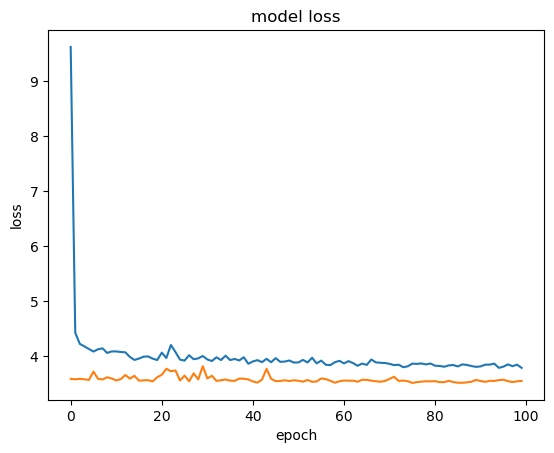

In [92]:
#RECCURENT NEUTRAL NETWORK
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()